In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [34]:
df = pd.read_csv("../data/BMSdataset/final_foresland.csv")
display(df)

,Unnamed: 0,Country,Product,Date,MonthlyTreatment,YrexMonthlyTreatment,Value,Data type,Indication,Sub-Indication,PatientsDescribed,YrexPatientsDescribed
0,0,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication split,Indication 20,Indication 20,0.036738,0.020889
1,1,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication split,Indication 14,Indication 14,0.000000,0.000000
2,2,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication split,Indication 12,Indication 12,0.107965,0.001071
3,3,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication split,Indication 1,Indication 1,0.000000,0.075094
4,4,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication split,Indication 23,Indication 23,0.159120,0.020139
...,...,...,...,...,...,...,...,...,...,...,...,...
523,523,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication split,Indication 19,Indication 19,0.288206,NaN
524,524,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication split,Indication 9,Indication 9,0.035901,0.004417
525,525,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication split,Indication 10,Indication 10,0.088251,0.004532
526,526,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication split,Indication 2,Indication 2-a,0.067962,0.050173


In [35]:
df = df[~(((df['Indication'] == 'Indication 15') & (df['Sub-Indication'] == 'Indication 15')) |((df['Indication'] == 'Indication 19') & (df['Sub-Indication'] == 'Indication 19')))]



In [36]:
display(df_tmp)
print(df_tmp.info())

NameError: name 'df_tmp' is not defined

In [37]:
df = df.drop(labels=["Country", "Product", "Data type", df.columns[0]], axis=1).set_index("Date")
display(df)

,MonthlyTreatment,YrexMonthlyTreatment,Value,Indication,Sub-Indication,PatientsDescribed,YrexPatientsDescribed
Date,,,,,,,
2020-08-01,7135.442800,8755.65000,3657300,Indication 20,Indication 20,0.036738,0.020889
2020-08-01,7135.442800,8755.65000,3657300,Indication 14,Indication 14,0.000000,0.000000
2020-08-01,7135.442800,8755.65000,3657300,Indication 12,Indication 12,0.107965,0.001071
2020-08-01,7135.442800,8755.65000,3657300,Indication 1,Indication 1,0.000000,0.075094
2020-08-01,7135.442800,8755.65000,3657300,Indication 23,Indication 23,0.159120,0.020139
...,...,...,...,...,...,...,...
2024-07-01,9653.302392,28975.41165,4932260,Indication 23,Indication 23,0.167442,0.049469
2024-07-01,9653.302392,28975.41165,4932260,Indication 9,Indication 9,0.035901,0.004417
2024-07-01,9653.302392,28975.41165,4932260,Indication 10,Indication 10,0.088251,0.004532


In [38]:
def generate_column_names(df):
    column_names = []
    for indication, subindication in df[["Indication", "Sub-Indication"]].apply(tuple, axis=1).unique():
        column_names.append(f"{indication} - {subindication}")
    return column_names
    

In [39]:
columns = ["MonthlyTreatment", "Value", *generate_column_names(df)]
df_pivoted = pd.DataFrame(columns=columns)

In [40]:
for index, row in df.iterrows():
    column_name = f"{row['Indication']} - {row['Sub-Indication']}"
    value = float(row["PatientsDescribed"])
    if index in df_pivoted.index:
        df_pivoted.loc[index, column_name] = value # Update value if index exists
    else:
        # Add a new row with NaN for all other columns and set the new value
        df_pivoted.loc[index] = pd.Series({col: (value if col == column_name else 0.0 ) for col in df_pivoted.columns})
        df_pivoted.loc[index, "MonthlyTreatment"] = float(row["MonthlyTreatment"])
        df_pivoted.loc[index, "Value"] = float(row["Value"])
        df_pivoted.loc[index, "YrexMonthlyTreatment"] = float(row["YrexMonthlyTreatment"])

In [41]:
display(df_pivoted)

,MonthlyTreatment,Value,Indication 20 - Indication 20,Indication 14 - Indication 14,Indication 12 - Indication 12,Indication 1 - Indication 1,Indication 23 - Indication 23,Indication 9 - Indication 9,Indication 10 - Indication 10,Indication 2 - Indication 2-a,Indication 2 - Indication 2-c,YrexMonthlyTreatment
2020-08-01,7135.442800,3657300.0,0.036738,0.000000,0.107965,0.000000,0.159120,0.000000,0.000000,0.074797,0.190324,8755.650000
2020-09-01,7825.007000,3970760.0,0.041275,0.000000,0.095040,0.000000,0.233350,0.000000,0.000000,0.038112,0.186258,9645.661900
2020-10-01,8191.023900,4102640.0,0.028784,0.000000,0.108166,0.000000,0.188553,0.000000,0.000000,0.085333,0.208993,11365.343300
2020-11-01,7232.573000,3661520.0,0.034917,0.000000,0.102501,0.000000,0.195321,0.000000,0.000000,0.086446,0.183216,10154.635800
2020-12-01,7152.792700,3601940.0,0.028764,0.000000,0.081230,0.000000,0.224823,0.000000,0.000000,0.051887,0.207327,10652.573800
2021-01-01,8835.918200,4452420.0,0.031276,0.000000,0.103094,0.000000,0.210281,0.000000,0.000000,0.066319,0.225995,12404.669600
2021-02-01,6574.143200,3362140.0,0.032556,0.000000,0.108209,0.000000,0.188993,0.000000,0.000000,0.075326,0.238573,10952.578100
2021-03-01,8410.040900,4280840.0,0.017403,0.000000,0.130749,0.000000,0.190532,0.000000,0.000000,0.076420,0.207123,12962.264000
2021-04-01,7323.121100,3778260.0,0.022109,0.001935,0.085051,0.015433,0.192356,0.001935,0.000000,0.082293,0.233575,13179.163800
2021-05-01,7395.975800,3836240.0,0.044048,0.015620,0.107287,0.018684,0.167440,0.001005,0.000000,0.099247,0.182873,12206.045200


In [42]:
# NORMALIZATION

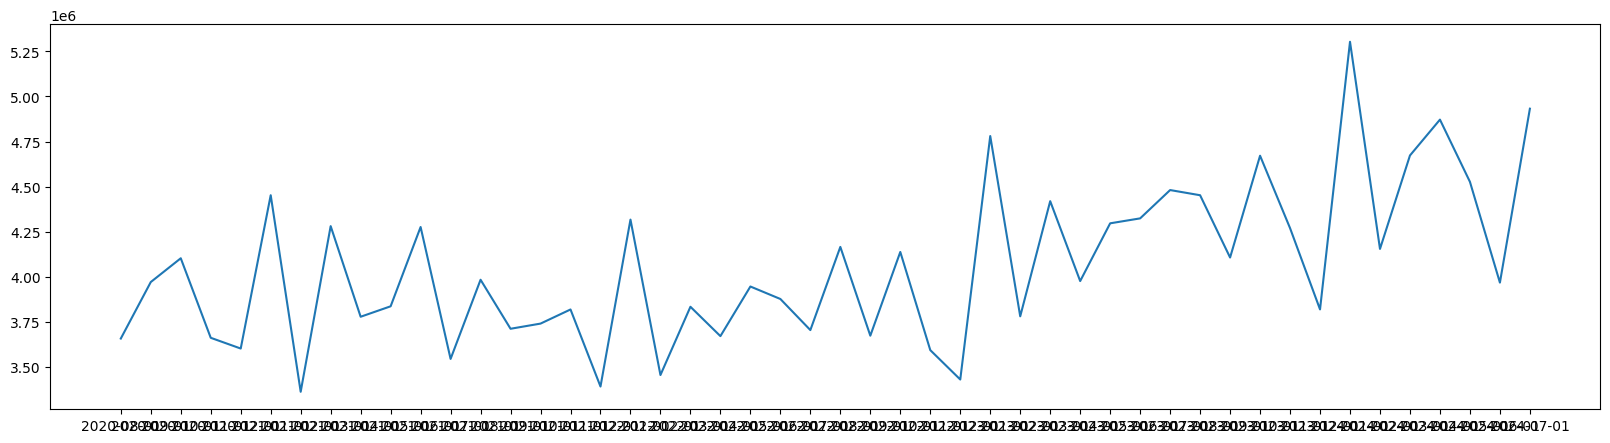

In [43]:
# Check seasonality of the data
plt.figure(figsize=(20,5))
plt.plot(df_pivoted["Value"])
plt.show()

In [44]:
result = adfuller(df_pivoted['Value'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

ADF Statistic: -0.5548272931033712
p-value: 0.8808660651429787
Critical Values:
1%: -3.6209175221605827
5%: -2.9435394610388332
10%: -2.6104002410518627


In [45]:
from statsmodels.tsa.api import VAR

# Fit the VAR model
model = VAR(df_pivoted)

# Fit the model with a maximum lag of 5 (you can adjust this depending on your analysis)
results = model.fit(maxlags=5)

# print(results.summary())

# Forecast the next 24 months (steps)
forecast = results.forecast(df_pivoted.values[-5:], steps=24)

# Print the forecasted values
print(forecast)

[[ 8.25195186e+03  4.32978393e+06  3.07221219e-03 -6.52103877e-03
   1.18940015e-01  5.33572119e-02  1.45730685e-01  3.67664118e-02
   6.49816264e-02  7.13707575e-02  1.81763518e-01  2.66067017e+04]
 [ 8.55320912e+03  4.52890774e+06  2.83038509e-02 -2.27744401e-03
   1.29564198e-01  5.11324424e-02  1.10775178e-01  4.65625534e-02
   5.58376248e-02  1.26533797e-01  1.95266220e-01  2.44252282e+04]
 [ 6.76882182e+03  3.57482567e+06  4.18801257e-02  1.95503601e-02
   5.51417228e-02  2.96005290e-02  2.08482306e-01  2.31538747e-02
   6.77136380e-02  2.19151717e-01  1.91262749e-01  2.39072386e+04]
 [ 8.41956301e+03  4.40688614e+06 -1.86206954e-02  1.84676012e-02
   1.56621211e-01  5.33023266e-02  1.66177236e-01  5.34175737e-02
   7.05099658e-02  8.34340347e-02  1.37235609e-01  2.83247121e+04]
 [ 7.44353385e+03  3.93183385e+06 -2.99921861e-02 -1.06170204e-02
   7.96518273e-02  4.23630254e-02  1.76420841e-01  8.42331142e-02
   3.65913664e-02  9.72999747e-02  1.44526223e-01  2.12181329e+04]
 [ 6.

c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


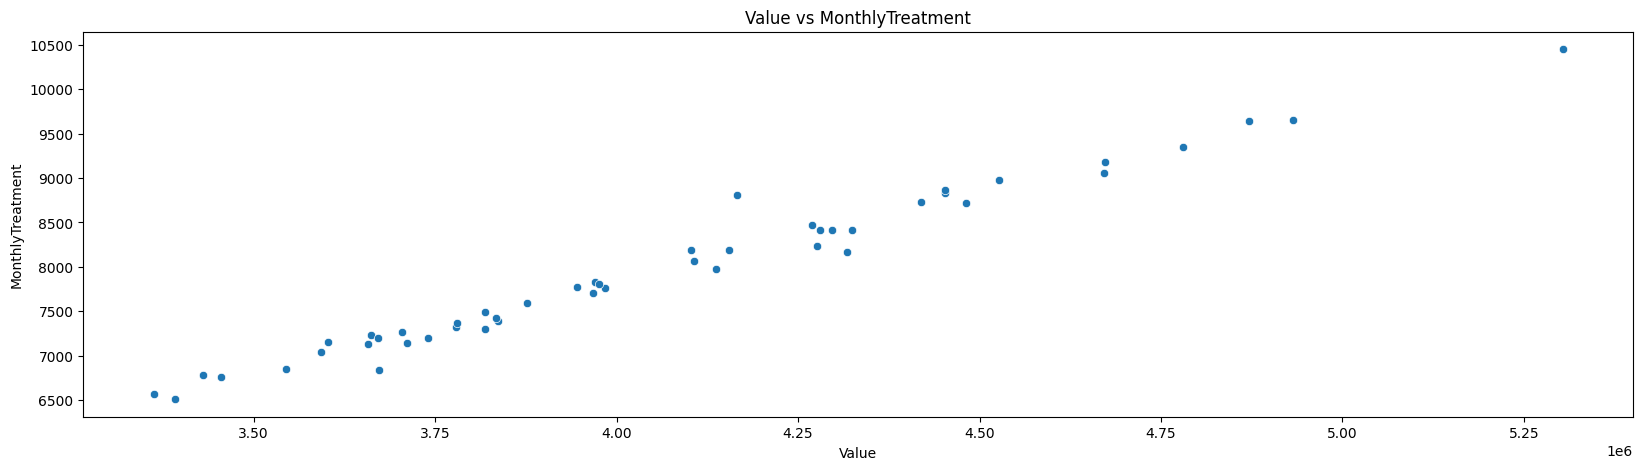

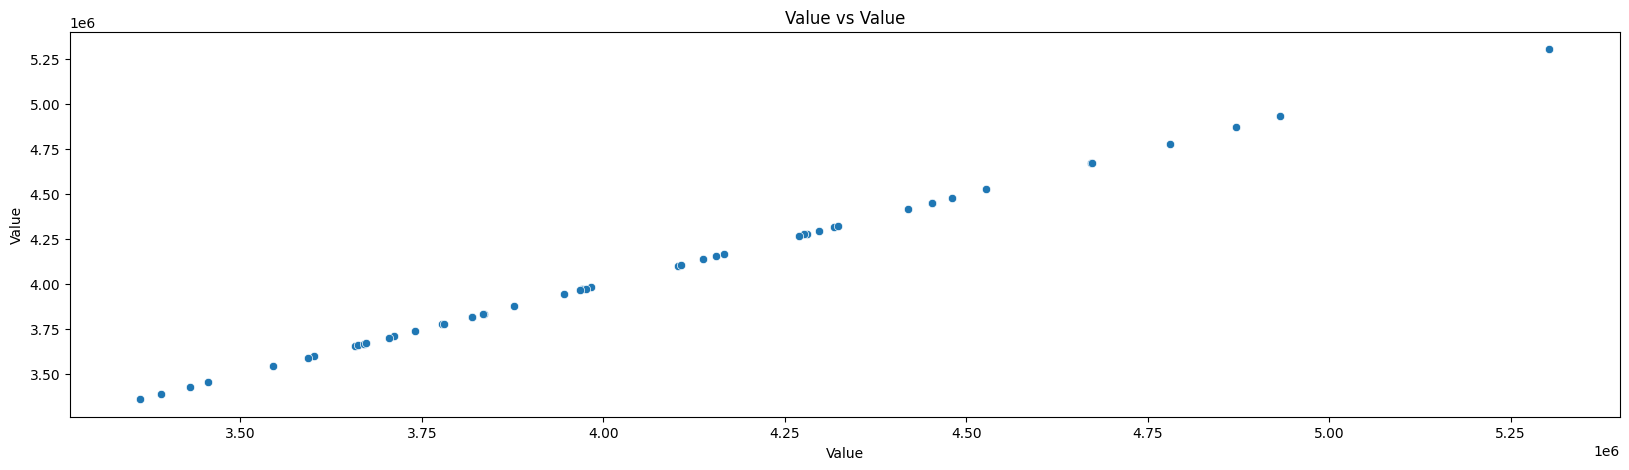

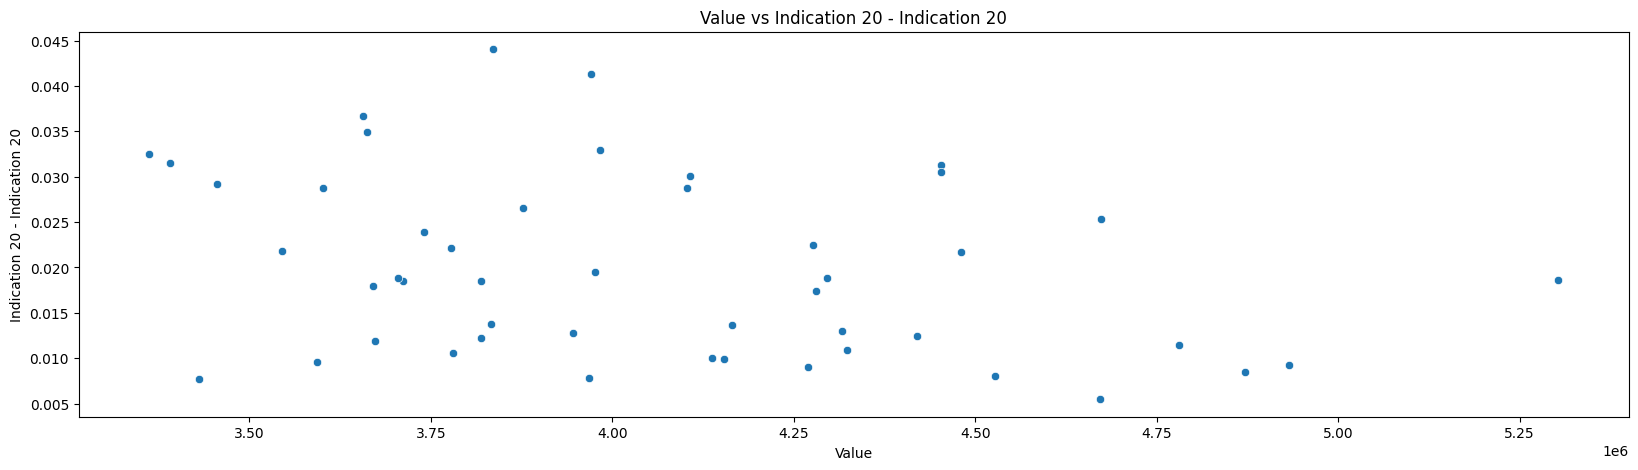

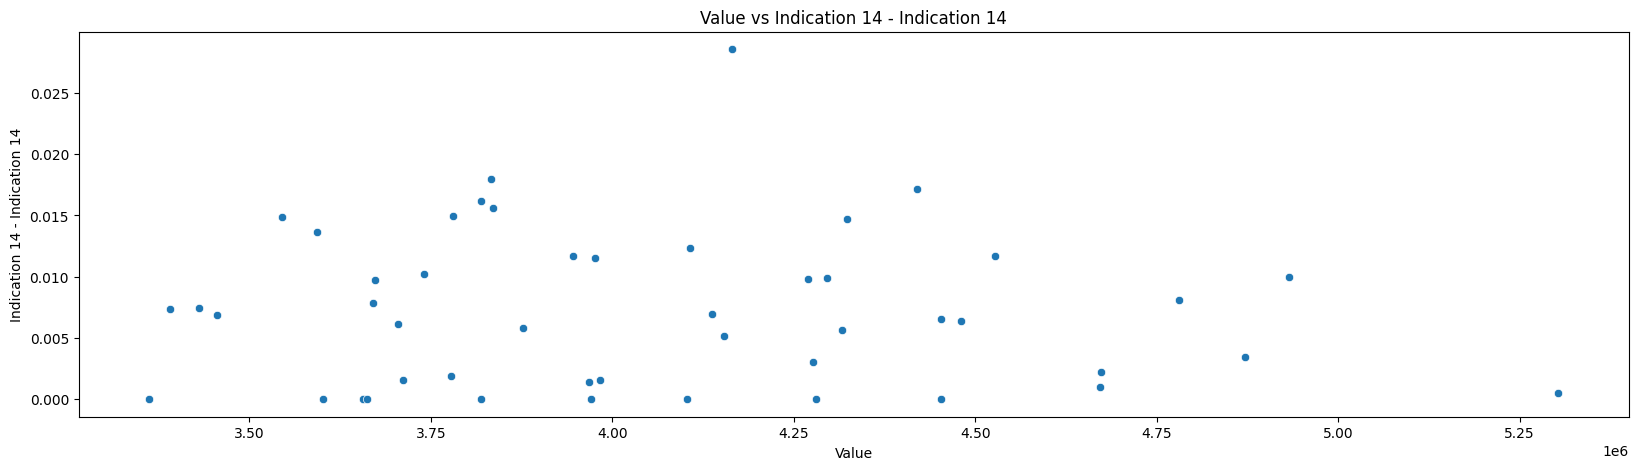

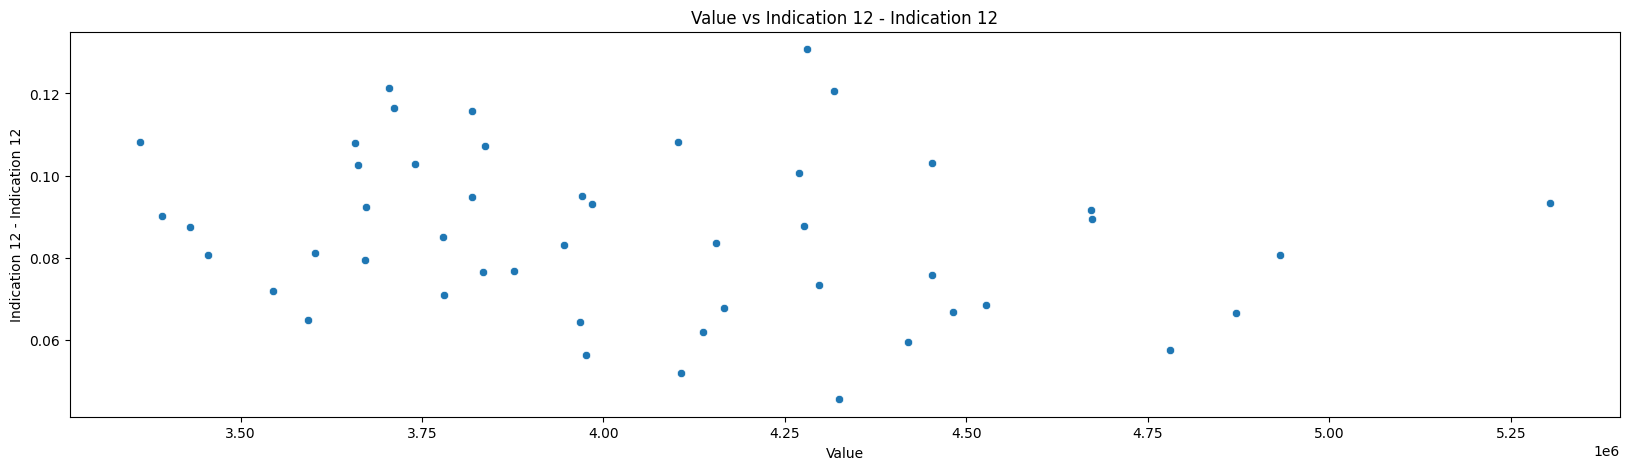

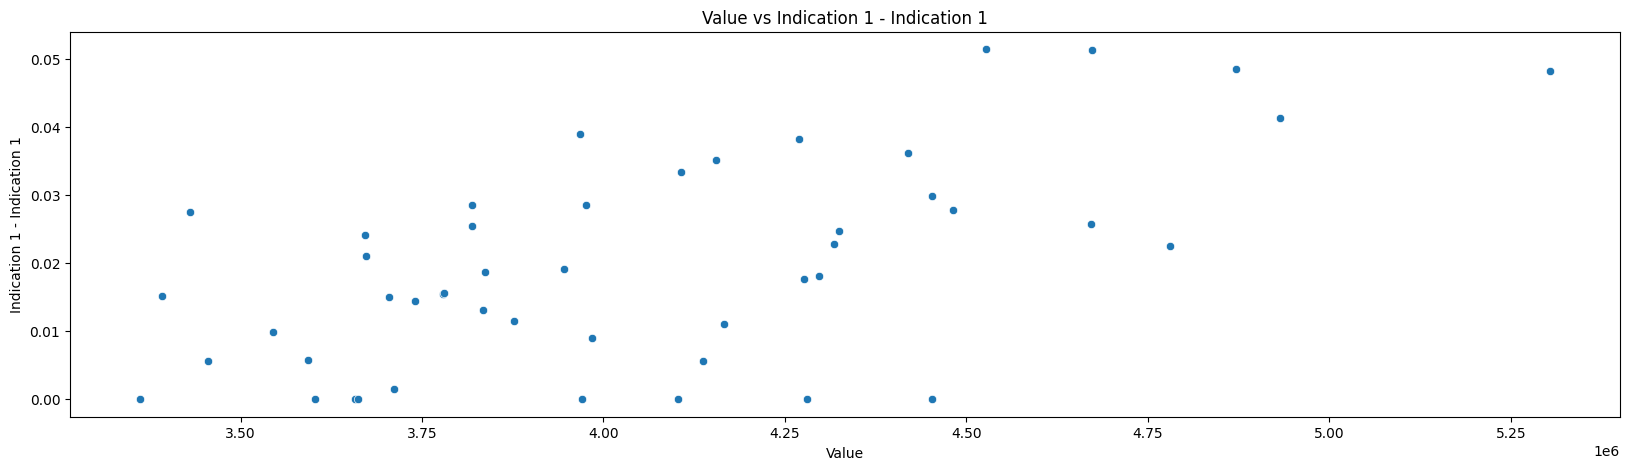

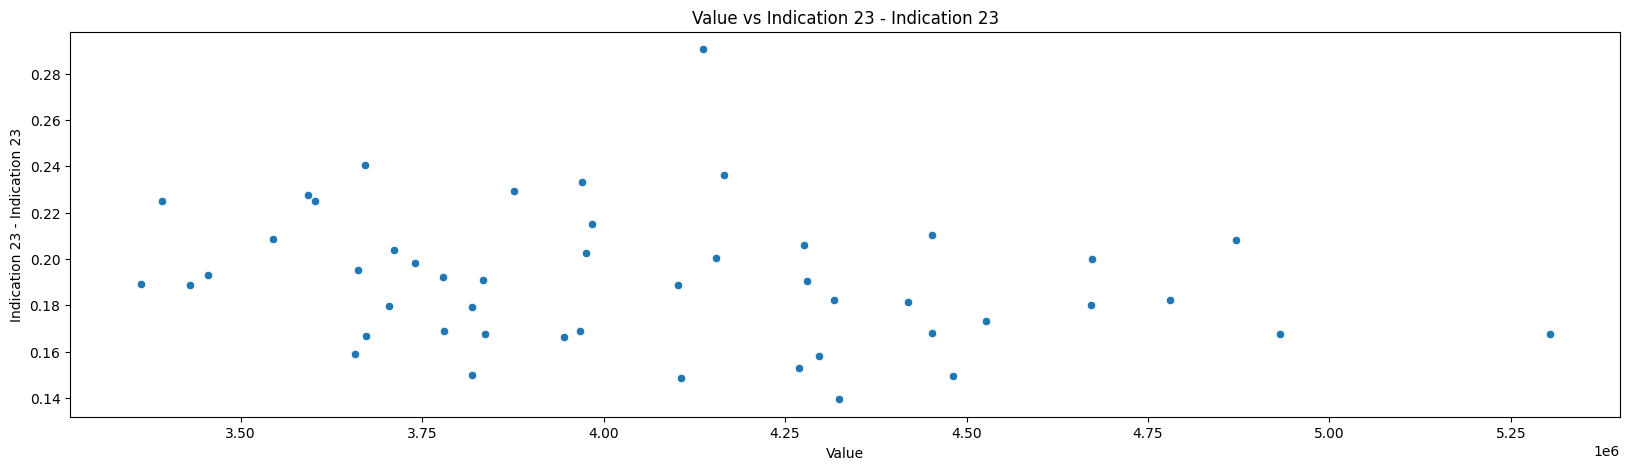

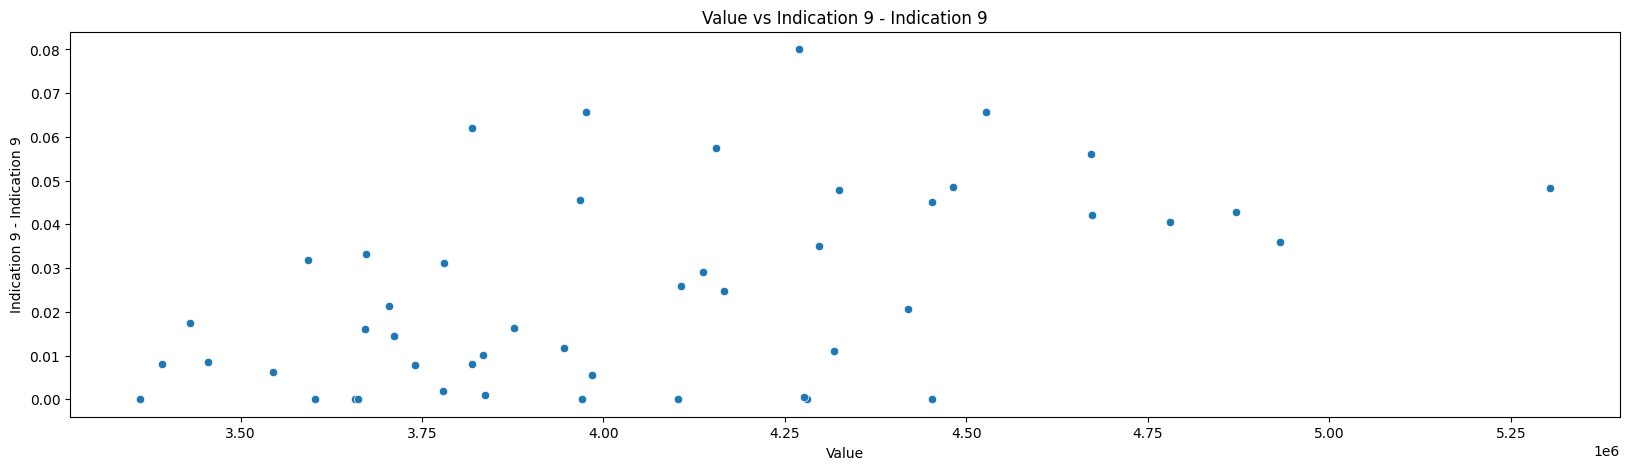

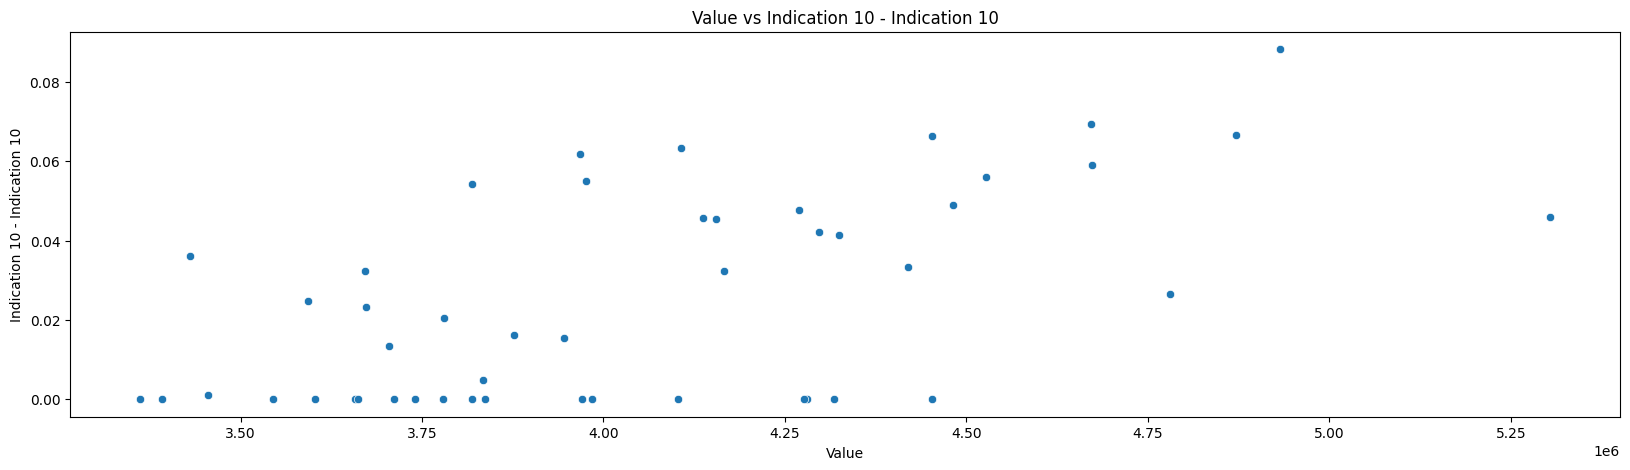

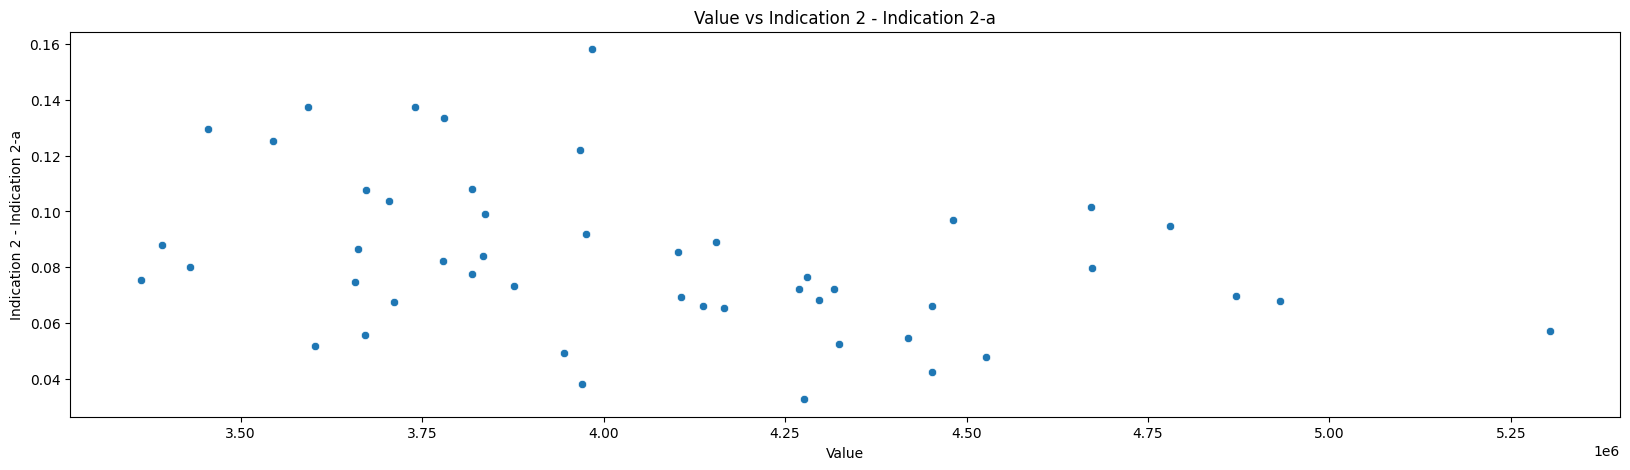

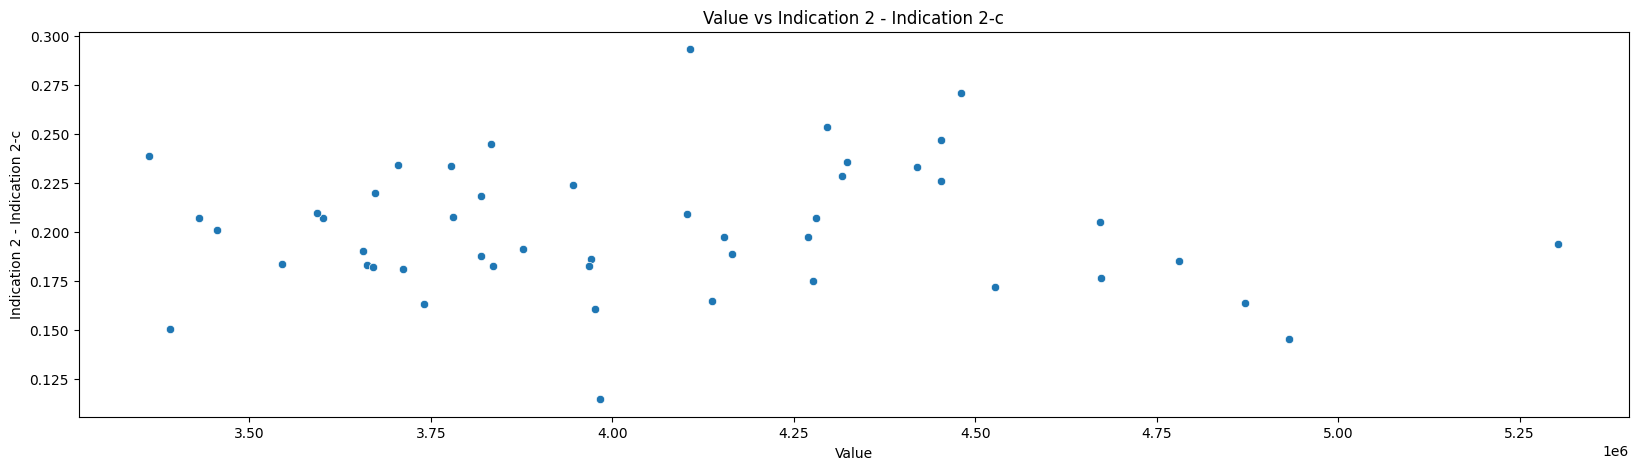

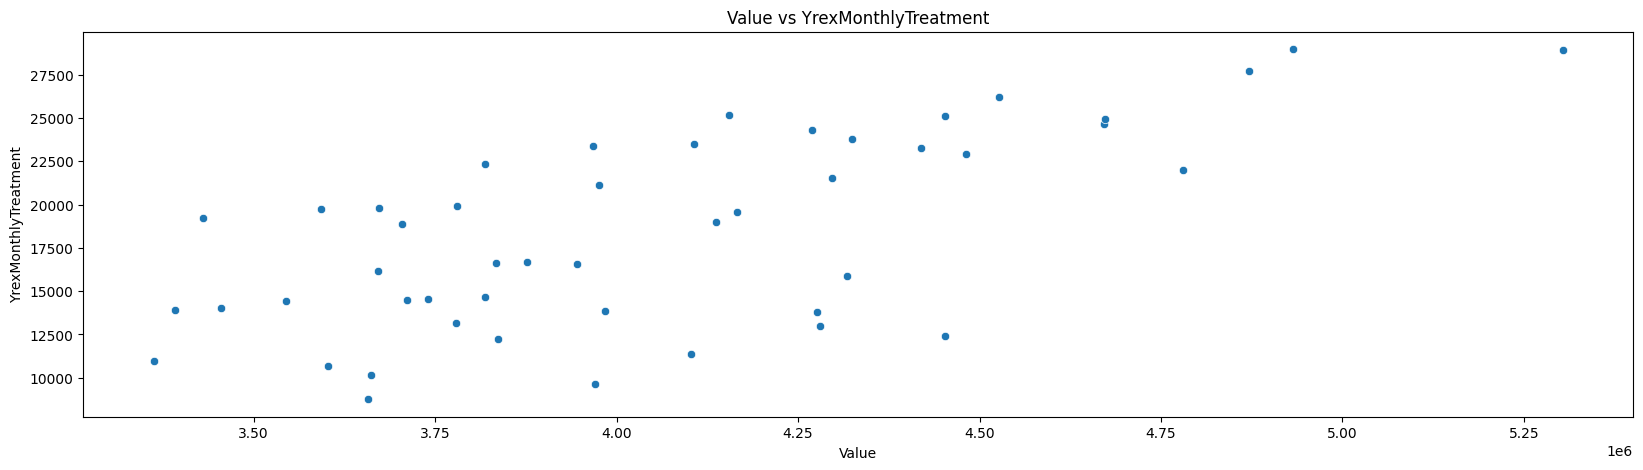

In [46]:
for column in df_pivoted.columns:
    plt.figure(figsize=(20,5))
    plt.title(f"Value vs {column}")
    sns.scatterplot(data=df_pivoted, x="Value", y=column)
    plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

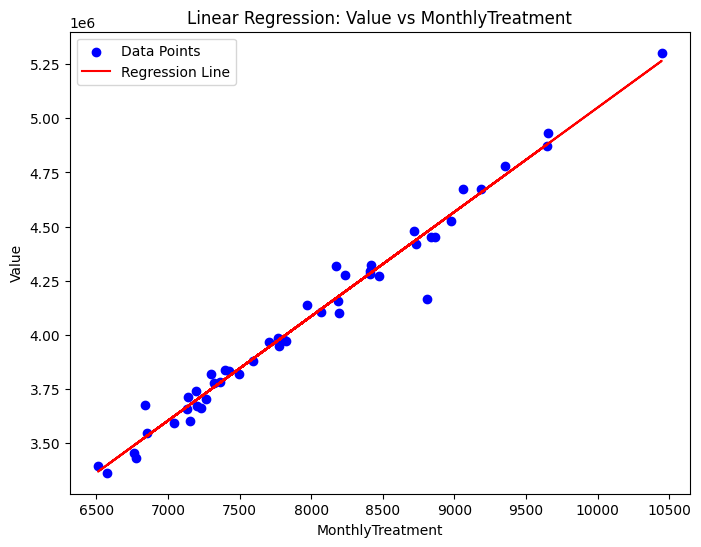

Regression for MonthlyTreatment:
  Coefficient (slope): 482.2885963530019
  Intercept: 226774.031246535



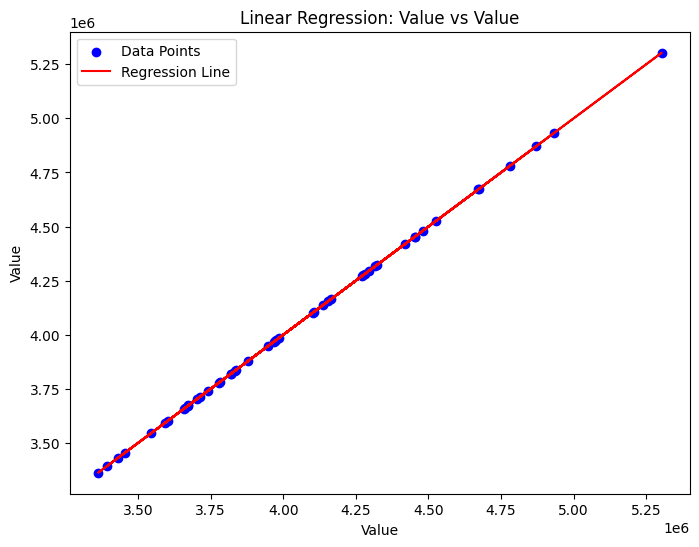

Regression for Value:
  Coefficient (slope): 1.0
  Intercept: 0.0



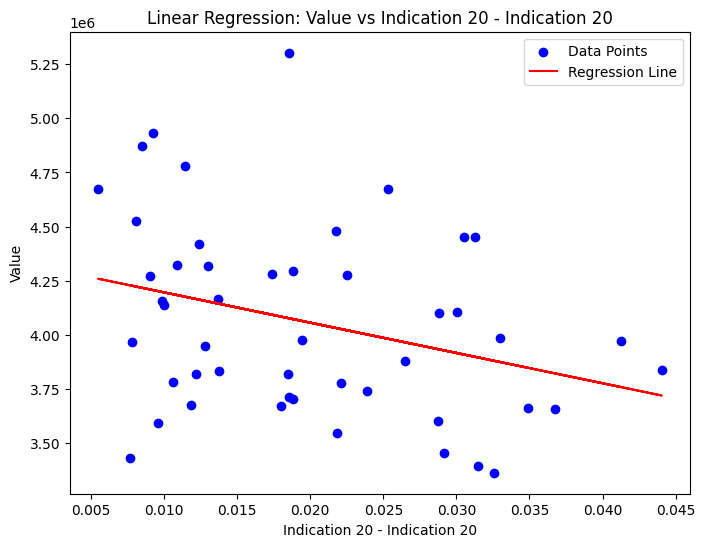

Regression for Indication 20 - Indication 20:
  Coefficient (slope): -14000072.591142757
  Intercept: 4335666.391017728



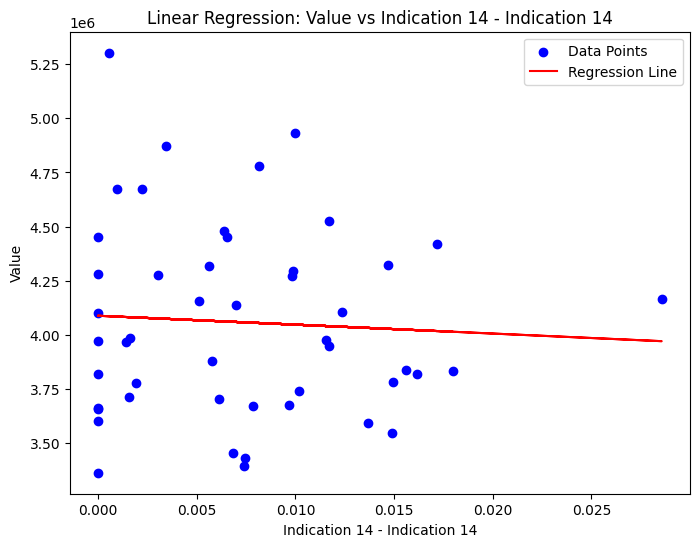

Regression for Indication 14 - Indication 14:
  Coefficient (slope): -4115464.732261579
  Intercept: 4087697.861771856



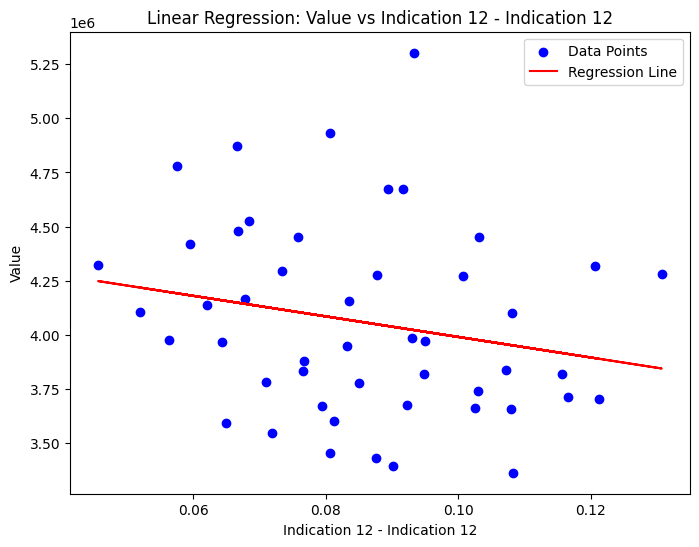

Regression for Indication 12 - Indication 12:
  Coefficient (slope): -4746439.662760078
  Intercept: 4464478.378451298



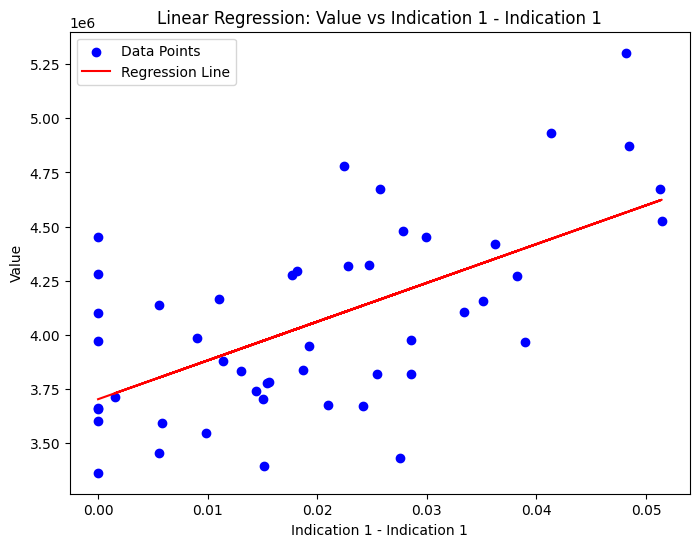

Regression for Indication 1 - Indication 1:
  Coefficient (slope): 17920314.342892684
  Intercept: 3701957.983110506



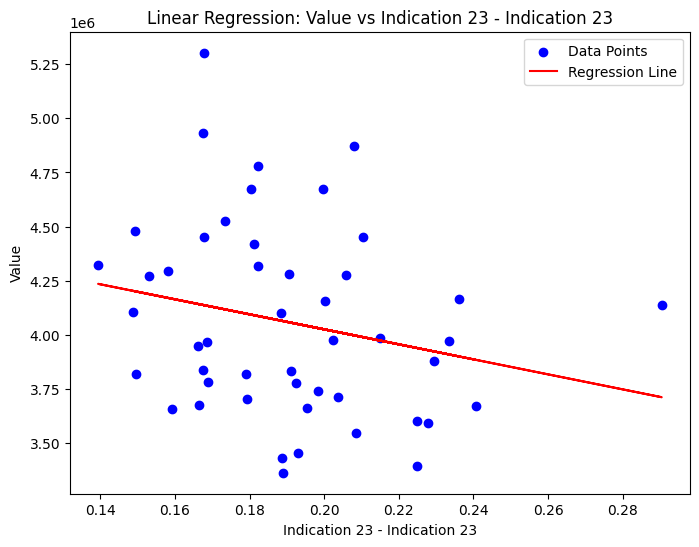

Regression for Indication 23 - Indication 23:
  Coefficient (slope): -3468404.313280267
  Intercept: 4718615.465386564



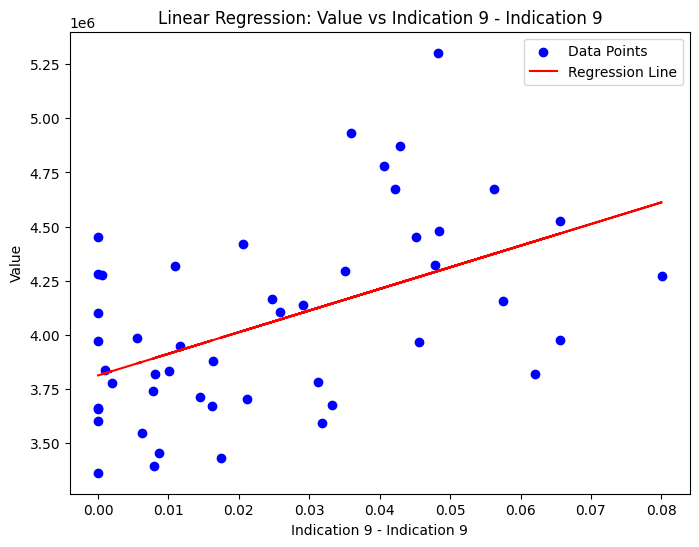

Regression for Indication 9 - Indication 9:
  Coefficient (slope): 9994807.478289489
  Intercept: 3811928.901426749



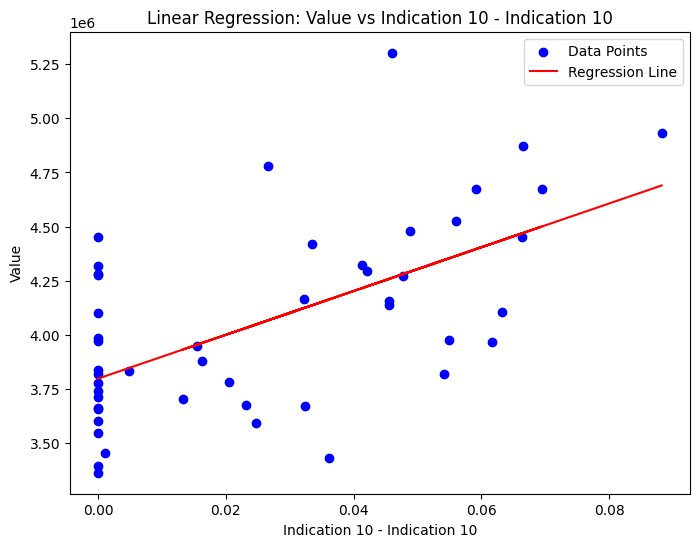

Regression for Indication 10 - Indication 10:
  Coefficient (slope): 10114849.983465223
  Intercept: 3797205.532157395



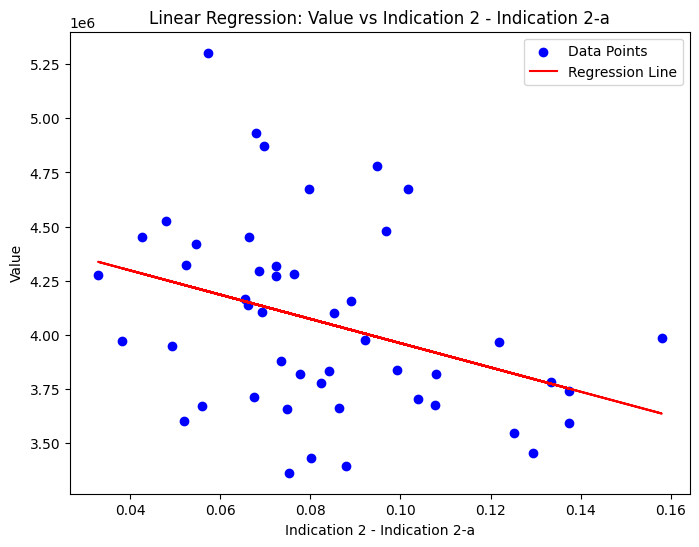

Regression for Indication 2 - Indication 2-a:
  Coefficient (slope): -5601502.779329996
  Intercept: 4520916.27265691



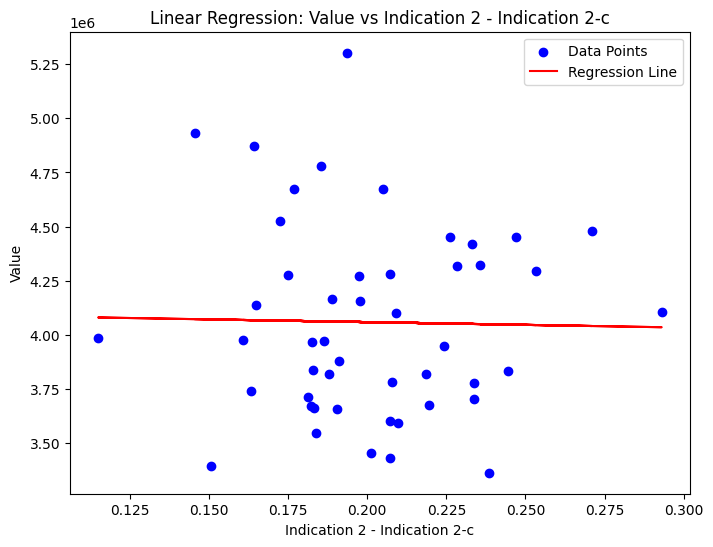

Regression for Indication 2 - Indication 2-c:
  Coefficient (slope): -253059.91340073876
  Intercept: 4108811.8769423584



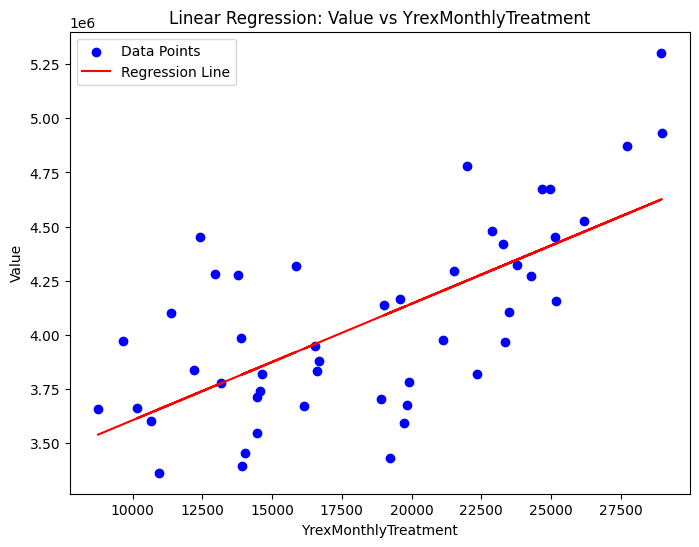

Regression for YrexMonthlyTreatment:
  Coefficient (slope): 53.78765596516994
  Intercept: 3067374.526229258



In [48]:
linear_regressions = {}

for idx, column in enumerate(df_pivoted.columns):
    X = df_pivoted[column].values.reshape(-1, 1)
    y = df_pivoted["Value"]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    linear_regressions[idx] = model

    # Predict using the model
    y_pred = model.predict(X)

    # Plotting the data points and the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of the original data
    plt.plot(X, y_pred, color='red', label='Regression Line')  # Regression line
    plt.xlabel(column)  # Label for the independent variable
    plt.ylabel('Value')  # Label for the dependent variable
    plt.title(f'Linear Regression: Value vs {column}')
    plt.legend()
    plt.show()

    # Print the slope (coefficient) and intercept of the regression line
    print(f"Regression for {column}:")
    print(f"  Coefficient (slope): {model.coef_[0]}")
    print(f"  Intercept: {model.intercept_}")
    print()

In [49]:
def update_variables(step, regressions, idx_input_column, weights=None):
    """
    step: vector containing the information to be update
    regressions: mapping from input column to dependent variables. Dictionary of the type {idx: regression model}
    idx_input_column: index of the input column
    weights: weights for updating the vector
    """

    new_step = step.copy()
    
    if weights is None:
        weights = [(0.5,0.5)]*len(step)

    for idx in range(len(step)):
        if idx != idx_input_column:
            # The update value is the weighted sum of the forecasted value and the value obtained through the regression
            new_step[idx] = step[idx]*weights[idx][0] + regressions[idx].predict(step[idx].reshape(1, -1) )*weights[idx][1]

    return new_step
    

def inference_with_assumption(df, results, assumption, assumption_step, future_step, regressions, weights):
    """
        df: Dataframe with the historical data
        results: Weights of the VAR model
        assumption: Tuple of the shape (input variable index, input variable value)
        assumption_step: time step where the assumption is made. Minimum 1.
        future_step: number of future time steps after the assumption step
        regressions: mapping from input variable to dependent variable
        weights: weights for the update variables step
    """
    initial_forecast = results.forecast(df.values[-5:], steps=assumption_step)
    initial_forecast[-1][assumption[0]] = assumption[1]

    initial_forecast[-1] = update_variables(initial_forecast[-1], regressions, assumption[0], weights=weights) 

    forecast_df = pd.DataFrame(initial_forecast, columns=df_pivoted.columns)
    input_df = pd.concat([df_pivoted, forecast_df], ignore_index=True)

    output = results.forecast(input_df.values[-5:], steps=future_step)
    output_df = pd.DataFrame(output, columns=df_pivoted.columns)

    final_df = pd.concat([input_df, output_df], ignore_index=True)
    
    return final_df
    
    

In [50]:
df_output = inference_with_assumption(df_pivoted, results, (1, 3.23163612e+06), 3, 3, linear_regressions, None)
display(df_output)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9772\1986899157.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_step[idx] = step[idx]*weights[idx][0] + regressions[idx].predict(step[idx].reshape(1, -1) )*weights[idx][1]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9772\1986899157.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_step[idx] = step[idx]*weights[idx][0] + regressions[idx].predict(step[idx].reshape(1, -1) )*weights[idx][1]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9772\1986899157.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract 

,MonthlyTreatment,Value,Indication 20 - Indication 20,Indication 14 - Indication 14,Indication 12 - Indication 12,Indication 1 - Indication 1,Indication 23 - Indication 23,Indication 9 - Indication 9,Indication 10 - Indication 10,Indication 2 - Indication 2-a,Indication 2 - Indication 2-c,YrexMonthlyTreatment
0,7.135443e+03,3.657300e+06,3.673761e-02,0.000000e+00,1.079650e-01,0.000000e+00,1.591202e-01,0.000000e+00,0.000000e+00,7.479655e-02,1.903237e-01,8.755650e+03
1,7.825007e+03,3.970760e+06,4.127537e-02,0.000000e+00,9.504033e-02,0.000000e+00,2.333499e-01,0.000000e+00,0.000000e+00,3.811169e-02,1.862581e-01,9.645662e+03
2,8.191024e+03,4.102640e+06,2.878430e-02,0.000000e+00,1.081656e-01,0.000000e+00,1.885534e-01,0.000000e+00,0.000000e+00,8.533337e-02,2.089935e-01,1.136534e+04
3,7.232573e+03,3.661520e+06,3.491737e-02,0.000000e+00,1.025012e-01,0.000000e+00,1.953208e-01,0.000000e+00,0.000000e+00,8.644629e-02,1.832159e-01,1.015464e+04
4,7.152793e+03,3.601940e+06,2.876364e-02,0.000000e+00,8.123001e-02,0.000000e+00,2.248235e-01,0.000000e+00,0.000000e+00,5.188717e-02,2.073268e-01,1.065257e+04
5,8.835918e+03,4.452420e+06,3.127558e-02,0.000000e+00,1.030943e-01,0.000000e+00,2.102815e-01,0.000000e+00,0.000000e+00,6.631872e-02,2.259950e-01,1.240467e+04
6,6.574143e+03,3.362140e+06,3.255599e-02,0.000000e+00,1.082090e-01,0.000000e+00,1.889925e-01,0.000000e+00,0.000000e+00,7.532647e-02,2.385727e-01,1.095258e+04
7,8.410041e+03,4.280840e+06,1.740301e-02,0.000000e+00,1.307485e-01,0.000000e+00,1.905321e-01,0.000000e+00,0.000000e+00,7.642021e-02,2.071235e-01,1.296226e+04
8,7.323121e+03,3.778260e+06,2.210940e-02,1.935146e-03,8.505073e-02,1.543302e-02,1.923562e-01,1.935146e-03,0.000000e+00,8.229316e-02,2.335752e-01,1.317916e+04
9,7.395976e+03,3.836240e+06,4.404821e-02,1.562029e-02,1.072872e-01,1.868409e-02,1.674399e-01,1.004512e-03,0.000000e+00,9.924674e-02,1.828730e-01,1.220605e+04


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Example dataframe (replace this with your actual data)
# df_pivoted is your dataset, where rows are time steps and columns are different variables.
# df_pivoted = pd.read_csv('your_dataset.csv')

# Split into training and test data
train_size = int(len(df_pivoted) * 0.8)  # 80% for training, 20% for testing
train_data = df_pivoted[:train_size]
test_data = df_pivoted[train_size:]

# Fit the VAR model to the training data
model = VAR(train_data)

# Fit the model with a maximum number of lags (you can try different values)
maxlags = 5
results = model.fit(maxlags=maxlags)

# Print the summary to check model parameters
print(results.summary())


# Forecast the next 8 steps (since we have 48 rows, we will forecast 8 future rows)
forecast_steps = len(test_data)

# Forecasting the next 'forecast_steps' time steps based on the most recent training data
forecast = results.forecast(train_data.values[-maxlags:], steps=forecast_steps)

# Convert forecast to a DataFrame for better readability
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Print forecasted values
print(forecast_df)

# Calculate Mean Squared Error (MSE) between the forecasted and actual test data
mse = mean_squared_error(test_data.values, forecast)
print(f"Mean Squared Error: {mse}")

# Use AIC or BIC to select the optimal lag
lag_order = results.k_ar  # Get the optimal lag order chosen by the model
print(f"Optimal number of lags: {lag_order}")

c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Dec, 2024
Time:                     10:05:26
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -464.256
Nobs:                     33.0000    HQIC:                  -486.283
Log likelihood:           8378.05    FPE:               1.00978e-229
AIC:                     -497.452    Det(Omega_mle):    3.53882e-235
--------------------------------------------------------------------
Results for equation MonthlyTreatment
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                 8044.711049        50.946659          157.905           0.000
L1.MonthlyTreatment                      0.779521         0.016559       

In [52]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume df_pivoted is your DataFrame with multivariate time series data
# df_pivoted = pd.read_csv('your_dataset.csv')

# Split into training and test sets (80% train, 20% test)
train_size = int(len(df_pivoted) * 0.8)  # 80% for training, 20% for testing
train_data = df_pivoted[:train_size]
test_data = df_pivoted[train_size:]

# Fit the VAR model to the training data
model = VAR(train_data)

# Fit the model with a maximum number of lags
maxlags = 5
results = model.fit(maxlags=maxlags)

# Forecast the next steps (length of test data)
forecast_steps = len(test_data)
forecast = results.forecast(train_data.values[-maxlags:], steps=forecast_steps)

# Convert the forecasted values to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, forecast)
print(f"Mean Squared Error: {mse}")

sqrt_mse = np.sqrt(mse)
print(f"Square root of the mean Squared Error: {sqrt_mse}")

# Optionally, check the optimal number of lags using AIC/BIC
lag_order = results.k_ar
print(f"Optimal lag order chosen by the model: {lag_order}")


Mean Squared Error: 131232684706.15346
Square root of the mean Squared Error: 362260.5204906456
Optimal lag order chosen by the model: 5


c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


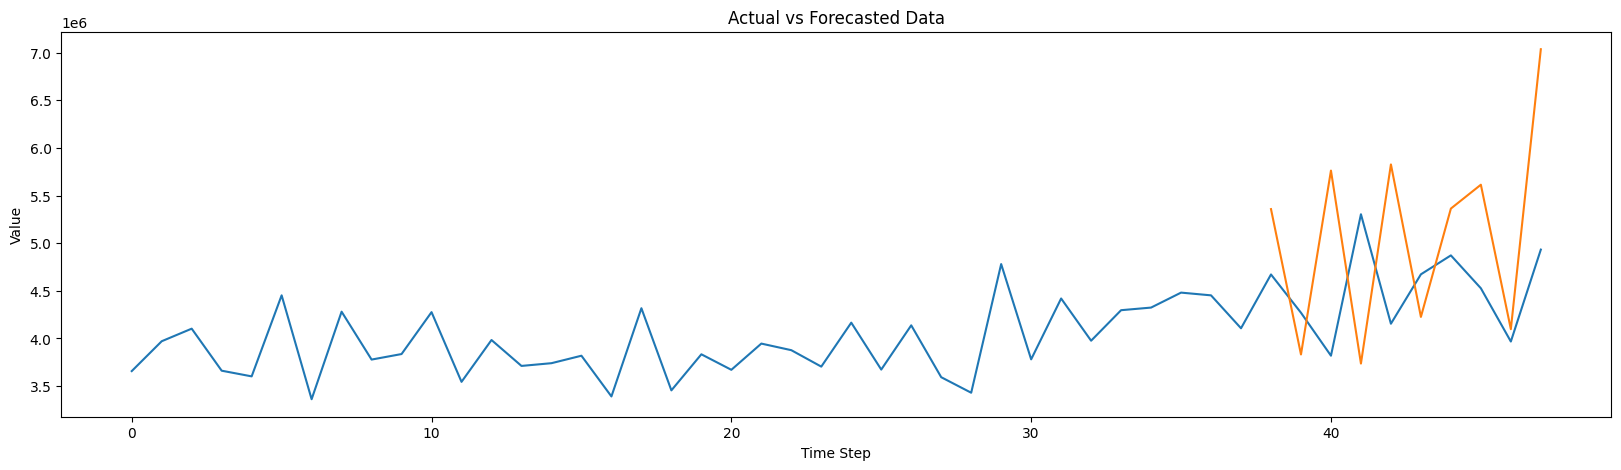

In [53]:
import matplotlib.pyplot as plt

# Create the figure and plot
plt.figure(figsize=(20, 5))

# Plot the test data and the forecasted data

real_values = [point[1] for point in df_pivoted.values]
forecast_values = [point[1] for point in forecast]

plt.plot(real_values, label='Actual Test Data')
plt.plot(range(len(train_data), len(train_data) + len(forecast_values)), forecast_values, label='Forecasted Data')



# Add title and labels
plt.title('Actual vs Forecasted Data')
plt.xlabel('Time Step')
plt.ylabel('Value')


# Display the plot
plt.show()


In [54]:
# Save the model pickle
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(results, f)